In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("final-result.csv")
df.head()

,Rank,University Name,Domain,MX,SPF,DKIM,DMARC
0,1,Tsinghua University,tsinghua.edu.cn,[<DNS IN MX rdata: 10 mta0.tsinghua.edu.cn.>],True,True,True
1,2,Peking University,pku.edu.cn,[<DNS IN MX rdata: 0 mx1.pku.edu.cn.>],True,True,True
2,3,Zhejiang University,zju.edu.cn,[<DNS IN MX rdata: 10 mail.zju.edu.cn.>],True,False,False
3,4,Shanghai Jiao Tong University,sjtu.edu.cn,[<DNS IN MX rdata: 20 mx03.sjtu.edu.cn.>],True,False,False
4,5,Fudan University,fudan.edu.cn,[<DNS IN MX rdata: 1 mx-fudan-edu-cn.icoremail...,True,True,True


In [3]:
len(df)

939

SPF
True     660
False    279
dtype: int64

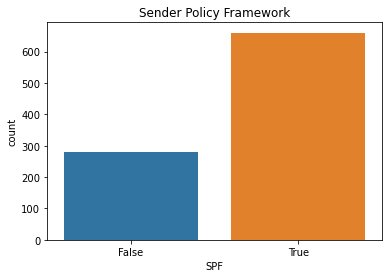

In [5]:
sns.countplot(data=df, x="SPF")
plt.title("Sender Policy Framework")
df.value_counts("SPF")

DMARC
False    672
True     267
dtype: int64

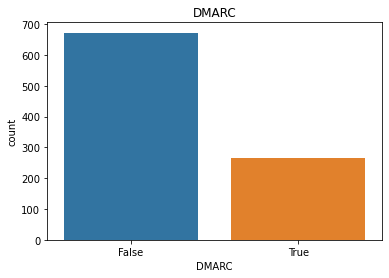

In [6]:
sns.countplot(data=df, x="DMARC")
plt.title("DMARC")
df.value_counts("DMARC")

DKIM
False    922
True      17
dtype: int64

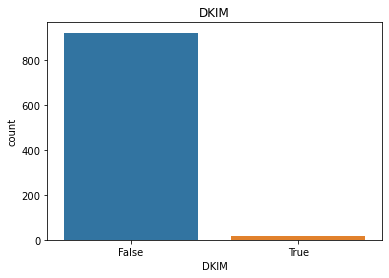

In [7]:
sns.countplot(data=df, x="DKIM")
plt.title("DKIM")
df.value_counts("DKIM")

In [9]:
def check_auth(row):
  if row["SPF"] and row["DMARC"]:
    return "both"
  elif row["SPF"]:
    return "SPF"
  elif row["DMARC"]:
    return "DMARC"
  else:
    return "Neither"
  
df["auth"] = df.apply(lambda x: check_auth(x), axis=1)

In [10]:
df

,Rank,University Name,Domain,MX,SPF,DKIM,DMARC,auth
0,1,Tsinghua University,tsinghua.edu.cn,[<DNS IN MX rdata: 10 mta0.tsinghua.edu.cn.>],True,True,True,both
1,2,Peking University,pku.edu.cn,[<DNS IN MX rdata: 0 mx1.pku.edu.cn.>],True,True,True,both
2,3,Zhejiang University,zju.edu.cn,[<DNS IN MX rdata: 10 mail.zju.edu.cn.>],True,False,False,SPF
3,4,Shanghai Jiao Tong University,sjtu.edu.cn,[<DNS IN MX rdata: 20 mx03.sjtu.edu.cn.>],True,False,False,SPF
4,5,Fudan University,fudan.edu.cn,[<DNS IN MX rdata: 1 mx-fudan-edu-cn.icoremail...,True,True,True,both
...,...,...,...,...,...,...,...,...
934,935,Heilongjiang University of Technology,hljut.edu.cn,[],False,False,False,Neither
935,936,West Yunnan University,wynu.edu.cn,[],False,False,False,Neither
936,937,Shenyang Institute of Science and Technology,syist.edu.cn,[<DNS IN MX rdata: 5 mxbiz1.qq.com.>],False,False,False,Neither
937,938,Sanming University,smxy.cn,[],False,False,False,Neither


auth
DMARC       17
Neither    262
SPF        410
both       250
Name: University Name, dtype: int64


<AxesSubplot:ylabel='University Name'>

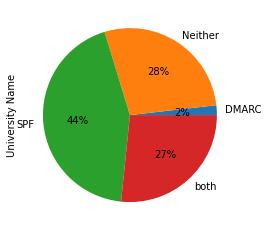

In [12]:
df_auth = df.groupby(['auth']).count()['University Name']
print(df_auth)
df_auth.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%')

In [14]:
df = pd.read_csv("final-result-1.csv")
df.head()

,Rank,University Name,Domain,MX,SPF,DKIM,DMARC
0,1,Tsinghua University,tsinghua.edu.cn,[<DNS IN MX rdata: 10 mta0.tsinghua.edu.cn.>],True,True,True
1,2,Peking University,pku.edu.cn,[<DNS IN MX rdata: 0 mx1.pku.edu.cn.>],True,True,True
2,3,Zhejiang University,zju.edu.cn,[<DNS IN MX rdata: 10 mail.zju.edu.cn.>],True,False,False
3,4,Shanghai Jiao Tong University,sjtu.edu.cn,[<DNS IN MX rdata: 20 mx03.sjtu.edu.cn.>],True,False,False
4,5,Fudan University,fudan.edu.cn,[<DNS IN MX rdata: 1 mx-fudan-edu-cn.icoremail...,True,True,True


In [15]:
len(df)

847

SPF
True     657
False    190
dtype: int64

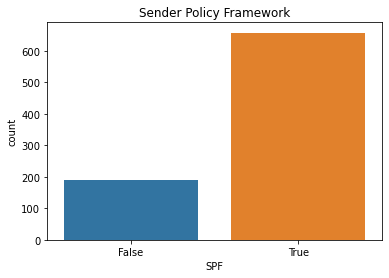

In [16]:
sns.countplot(data=df, x="SPF")
plt.title("Sender Policy Framework")
df.value_counts("SPF")

DMARC
False    582
True     265
dtype: int64

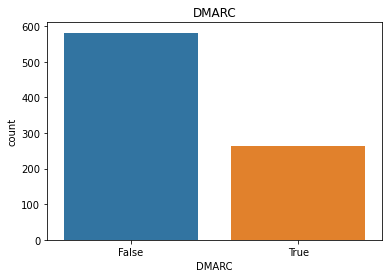

In [17]:
sns.countplot(data=df, x="DMARC")
plt.title("DMARC")
df.value_counts("DMARC")

DKIM
False    830
True      17
dtype: int64

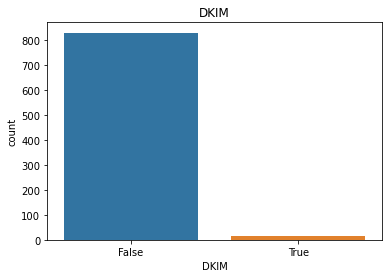

In [18]:
sns.countplot(data=df, x="DKIM")
plt.title("DKIM")
df.value_counts("DKIM")

In [19]:
def check_auth(row):
  if row["SPF"] and row["DMARC"]:
    return "both"
  elif row["SPF"]:
    return "SPF"
  elif row["DMARC"]:
    return "DMARC"
  else:
    return "Neither"
  
df["auth"] = df.apply(lambda x: check_auth(x), axis=1)

In [20]:
df

,Rank,University Name,Domain,MX,SPF,DKIM,DMARC,auth
0,1,Tsinghua University,tsinghua.edu.cn,[<DNS IN MX rdata: 10 mta0.tsinghua.edu.cn.>],True,True,True,both
1,2,Peking University,pku.edu.cn,[<DNS IN MX rdata: 0 mx1.pku.edu.cn.>],True,True,True,both
2,3,Zhejiang University,zju.edu.cn,[<DNS IN MX rdata: 10 mail.zju.edu.cn.>],True,False,False,SPF
3,4,Shanghai Jiao Tong University,sjtu.edu.cn,[<DNS IN MX rdata: 20 mx03.sjtu.edu.cn.>],True,False,False,SPF
4,5,Fudan University,fudan.edu.cn,[<DNS IN MX rdata: 1 mx-fudan-edu-cn.icoremail...,True,True,True,both
...,...,...,...,...,...,...,...,...
842,927,Harbin Huade University,hhdu.edu.cn,[<DNS IN MX rdata: 10 mail.hhdu.edu.cn.>],False,False,False,Neither
843,929,Heilongjiang College of Business and Technology,hibu.edu.cn,[<DNS IN MX rdata: 0 hibu-edu-cn.mail.protecti...,True,False,False,SPF
844,930,Dalian University of Science and Technology,dlust.edu.cn,[<DNS IN MX rdata: 10 hzmx02.mxmail.netease.co...,True,False,True,both
845,934,West Yunnan University of Applied Sciences,wyuas.edu.cn,[<DNS IN MX rdata: 10 mail.wyuas.edu.cn.>],True,False,False,SPF


auth
DMARC       16
Neither    174
SPF        408
both       249
Name: University Name, dtype: int64


<AxesSubplot:ylabel='University Name'>

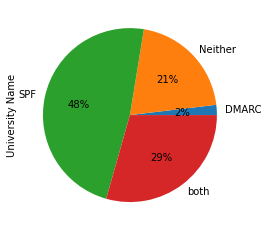

In [21]:
df_auth = df.groupby(['auth']).count()['University Name']
print(df_auth)
df_auth.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%')

SPF
False    190
True     657
Name: University Name, dtype: int64


<AxesSubplot:ylabel='University Name'>

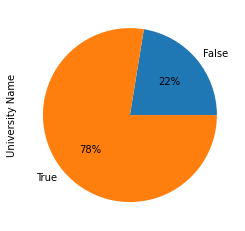

In [23]:
df_spf = df.groupby(['SPF']).count()['University Name']
print(df_spf)
df_spf.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%')

DMARC
False    582
True     265
Name: University Name, dtype: int64


<AxesSubplot:ylabel='University Name'>

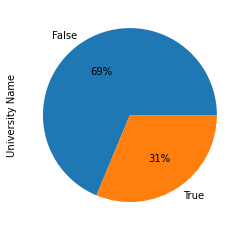

In [24]:
df_dmarc = df.groupby(['DMARC']).count()['University Name']
print(df_dmarc)
df_dmarc.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%')

In [29]:
def mx(row):
    if "qq" in row["MX"]:
        return "qq"
    elif "netease" in row["MX"]:
        return "netease"
    elif "icoremail" in row["MX"]:
        return "coremail"
    elif "163" in row["MX"]:
        return "netease"
    elif "outlook" in row["MX"]:
        return "outlook"
    elif "eyou" in row["MX"]:
        return "eyou"
    elif "aliyun" in row["MX"]:
        return "aliyun"
    elif "edu.cn" in row["MX"]:
        return "own server"
    else:
        return "other"

df["Server"] = df.apply(lambda x: mx(x), axis=1)

In [30]:
df

,Rank,University Name,Domain,MX,SPF,DKIM,DMARC,auth,Server
0,1,Tsinghua University,tsinghua.edu.cn,[<DNS IN MX rdata: 10 mta0.tsinghua.edu.cn.>],True,True,True,both,own server
1,2,Peking University,pku.edu.cn,[<DNS IN MX rdata: 0 mx1.pku.edu.cn.>],True,True,True,both,own server
2,3,Zhejiang University,zju.edu.cn,[<DNS IN MX rdata: 10 mail.zju.edu.cn.>],True,False,False,SPF,own server
3,4,Shanghai Jiao Tong University,sjtu.edu.cn,[<DNS IN MX rdata: 20 mx03.sjtu.edu.cn.>],True,False,False,SPF,own server
4,5,Fudan University,fudan.edu.cn,[<DNS IN MX rdata: 1 mx-fudan-edu-cn.icoremail...,True,True,True,both,coremail
...,...,...,...,...,...,...,...,...,...
842,927,Harbin Huade University,hhdu.edu.cn,[<DNS IN MX rdata: 10 mail.hhdu.edu.cn.>],False,False,False,Neither,own server
843,929,Heilongjiang College of Business and Technology,hibu.edu.cn,[<DNS IN MX rdata: 0 hibu-edu-cn.mail.protecti...,True,False,False,SPF,outlook
844,930,Dalian University of Science and Technology,dlust.edu.cn,[<DNS IN MX rdata: 10 hzmx02.mxmail.netease.co...,True,False,True,both,netease
845,934,West Yunnan University of Applied Sciences,wyuas.edu.cn,[<DNS IN MX rdata: 10 mail.wyuas.edu.cn.>],True,False,False,SPF,own server


Server
aliyun          4
coremail       52
eyou            8
netease       208
other          28
outlook         9
own server    183
qq            355
Name: University Name, dtype: int64


<AxesSubplot:ylabel='University Name'>

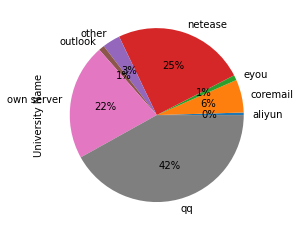

In [31]:
df_sev = df.groupby(['Server']).count()['University Name']
print(df_sev)
df_sev.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%')

In [32]:
df.to_csv('analysis-result.csv')